# We will See analysis for customer Spend data: for Heirarchial clustering

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline

#Using  Z score of from sci-fi particularliy 
beacuase we would want to normalize our input Data. We want to take each of the columns for 
any clustering Meachinism.
As in most machine learning steps to be able to take each column and re write those columns in terms of Z score, Which is essentially
every column number becomes the number 
of standard Deviation away from the mean of each column.

In [7]:
from scipy.stats import zscore

In [8]:
import seaborn as sns

Lets Load Entire Data Set
It has 10 Customers Named a2j. What do they do?

Each Customer has specific set of attributes, 

example on an average spins.
Customer A
It did ten thousends dollars monthly visists the store twice monthly
fee talking about
a particular retail store and there are three diffrent kinds of items that the store carries 
apple foods and vegetables and staples and what this is what 
they do customer type A never bought  staples but customer type B did not buy.
any apple items but Bottle bunch of grocessires as you can see if you go through
 if you just eyeball this whole UT customer e also doing
pretty much the same thing as customer A be maybe.
So E also Doing pretty Much very Similar things.

But Customer G and What was that E do say Spend Significantly less amount, you know lesser
per month than a customer together.

Target Certain Customers with certain ads trying to move customer to one group to another group trying to keep track.
how one group eveloevs and so on so forth. So there's 
lot of Ineterest in trying to understand your 
customers beacuse that would be the first step in trying to take advantage of you know, whatever you might learn.

look at all the column ... these are all Numerical, These are the column i really like to Isolate. 

If i take distance between 0 and 1 or customer A and B any kind of distance more specifically the euclidean distance Will 
be dominated by this beacuse this is 3000 units diffrent while this just nine units diffrent nine 

So this column Will Dominate any Measure of distance and therefore what will happen is things like this and this customer.

Number 6 or 7 or G and H will be Incredibly Close to one another,
even though all that other four columns are quite diffrent.

But Becauseof the fact that these two are so close you ll end up avaergae.


In [9]:
# reading the CSV file into pandas dataframe
custData = pd.read_csv("Cust_Spend_Data.csv") 
custData.head(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


Removing Categorical Variable: Removing Name and Customer ID

In [10]:

custDataAttr=custData.iloc[:,2:]
custDataAttr.head()



,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


Applying Z score is done for scaling the Data Xi

In [11]:
custDataScaled=custDataAttr.apply(zscore)
custDataScaled.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


WIth Pair plot We can find diagonally for Cluster available by density plot.


We will Do here see the daiognal ....we see the margin

So all of these would kind of give you an insight into how many Clusters you might need 


Even the marginals of apple items has at least two diffrent distributions that have one group
around this and another group around this at to you know, You can go buy a picture by Pictures...this one give you number of clusters you need to this is to.

Then you might want to do 3D packed lots of Cadiz, you know, you might want to do Y axis which is the density with two diffrent x axis.

Which is probably you know, Apples items 
and Foods and Vegetable items or something like that to get a better and better sense of how.

In this analysis we are going to try whole bunch of clusters and use the elbow method to essentially argue to ourselves, Which is the best.
distnace measure and so on.

Function  Digonal = KDE


Then you might want to do 3D packed lots of Cadiz, you know, you might want to do Y axis which is the density with two diffrent x axis.

Which is probably you know, Apples items 
and Foods and Vegetable items or something like that to get a better and better sense of how.



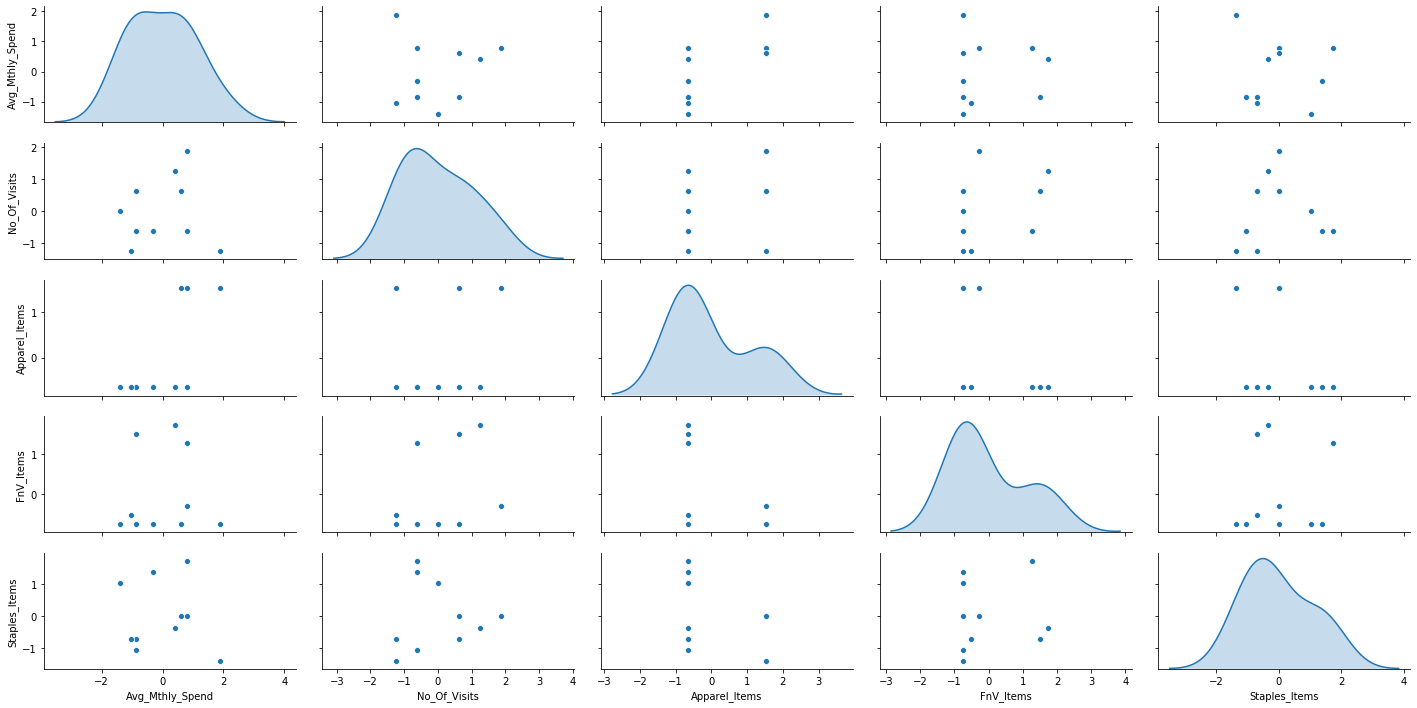

In [12]:
#importing seaborn for statistical plots
sns.pairplot(custDataScaled, height=2,aspect=2 , diag_kind='kde')

# Agglomerative : Bottom to top approch: Start with diffrent clusters                                                                             #Divisive: Top to bottom Approch: Start with one cluseter and further divides in to diffrent clusters

In this analysis we are going to try whole bunch of clusters and use the elbow method to essentially argue to ourselves, We are going to Import Agglomerative clustering Package from Sclearn.

...The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
Average linkage minimizes the average of the distances between all observations of pairs of clusters.
Single linkage minimizes the distance between the closest observations of pairs of clusters.
AgglomerativeClustering can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

In [12]:
from sklearn.cluster import AgglomerativeClustering 

Which is the best.
distnace measure and so on here we taking cluster =3, We will try to find eigen value and vectros for dataset and then go find the real k by elbow method.


In [19]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

Insert the scaled data into fit model.

In [20]:
model.fit(custDataScaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [21]:
custDataAttr['labels'] = model.labels_
custDataAttr.head(10)

#custDataAttr.groupby(["labels"]).count()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


Grouping by Labels as which cluster it belongs to: labels 0,1,2

In [22]:
custDataClust = custDataAttr.groupby(['labels'])

we take mean for each group/labels for 0,1 ,2

In [25]:
custDataClust.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


Import Distane calculate package: Cophenet


In [26]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

#Pairwise distribution between data points

pdist calculate the distnace pair wise between in cluster and Find co- relation 

In [27]:
from scipy.spatial.distance import pdist  

In [29]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.8681149436293064

Design the dendo gram , As we have distnace between datapoint Avaerage linkage and Pair wise distance between clusters.

# Dendogram: Dendo gram is used to represent distance between  two points cluster , The dendogram corresponding to highest corelation coefficient is considered to be betterr representative of the clustered data and is used to produce label.

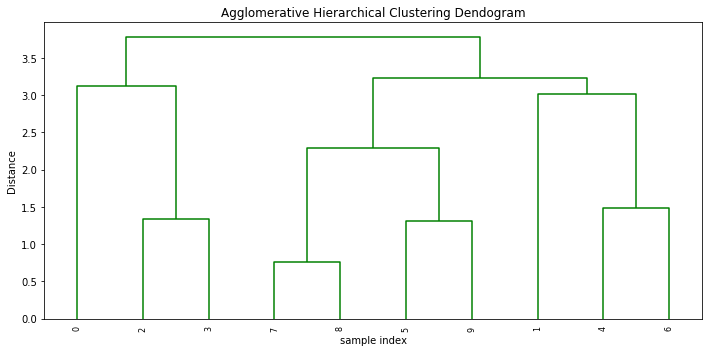

In [30]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

# Cophenetic Correlation Computes the correlation between the euclidean distnace and dendogram distance for a particular dendogram of all possible pair of points

Now we take Method = Complete ... for forming a dendogram by this distance method

In [31]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.8606955190809153

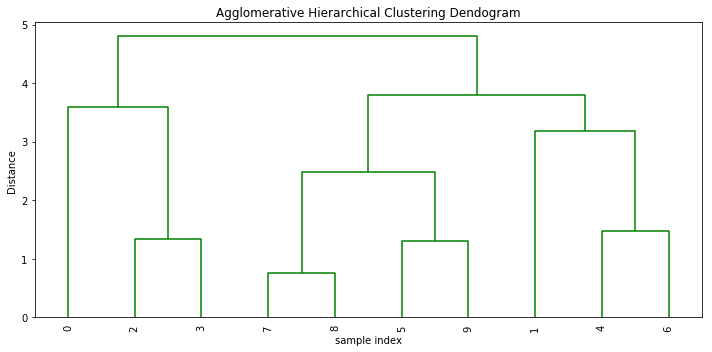

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

This time we take distance method= Ward

In [33]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.8453818941339526

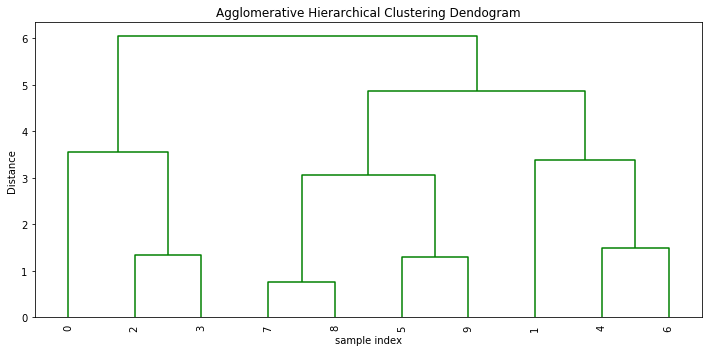

In [34]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()